In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Least Squares Linear Regression**

> Please refer to the questions at the bottoms for further analysis. 



Training set

In [ ]:
X = np.array([1, 2, 3, 4, 5, 10, 11, 12, 13])
Y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])

Visualize the dataset

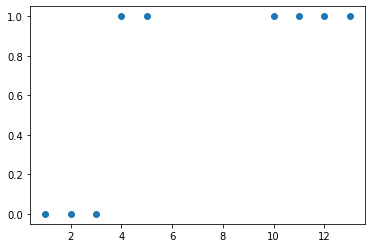

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X, Y)

# 1.1 Estimate the slope

Linear regression slope can be defined by $y = mx+b$. $m$ and $b$ can be calculated using the formula:  

$m$ = $(n\displaystyle\sum_  {i=1} ^{n} XY - \displaystyle\sum_  {i=1} ^{n} X\displaystyle\sum_  {i=1} ^{n} Y)/(n\displaystyle\sum_  {i=1} ^{n} X^2 - (\displaystyle\sum_  {i=1} ^{n} X)^2$

$b$ = $(\displaystyle\sum_  {i=1} ^{n} Y - m\displaystyle\sum_  {i=1} ^{n} X)/n$

# 1.1.2 Calculate the required sums

In [ ]:
df = pd.DataFrame({
    'X': X,
    'Y': Y,
    'XY': X * Y,
    'X**2': X**2
})
n = len(X)
print(f"n : {n}")
df

n : 9


,X,Y,XY,X**2
0,1,0,0,1
1,2,0,0,4
2,3,0,0,9
3,4,1,4,16
4,5,1,5,25
5,10,1,10,100
6,11,1,11,121
7,12,1,12,144
8,13,1,13,169


In [ ]:
(X_sum, Y_sum, XY_sum, X_square_sum) = df.sum(axis=0)
print(f"X_sum : {X_sum}")
print(f"Y_sum : {Y_sum:.2f}")
print(f"XY_sum : {XY_sum}")
print(f"X_square_sum : {X_square_sum}")

X_sum : 61
Y_sum : 6.00
XY_sum : 55
X_square_sum : 589


# 1.1.3 Substitute in values 

In [ ]:
rise = n * XY_sum - X_sum * Y_sum
print(f"{rise:.2f}")

129.00


In [ ]:
run = n * X_square_sum - (X_sum)**2
print(f"{run:.2f}")

1580.00


# 1.1.4 Calculate slope

In [ ]:
m_1 = rise/run
print(f" m = {m_1:.12f}")

 m = 0.081645569620


# 1.2 Calculate y-intercept

In [ ]:
b_1 = (Y_sum - m_1 * X_sum)/n
print(f" b = {b_1:.12f}")

 b = 0.113291139241


# 1.3 Resulting equation

$\hat{Y}= 0.081645569620x+0.113291139241$

In [ ]:
Y_approximation = m_1*X + b_1

# 1.4 Visualize Results

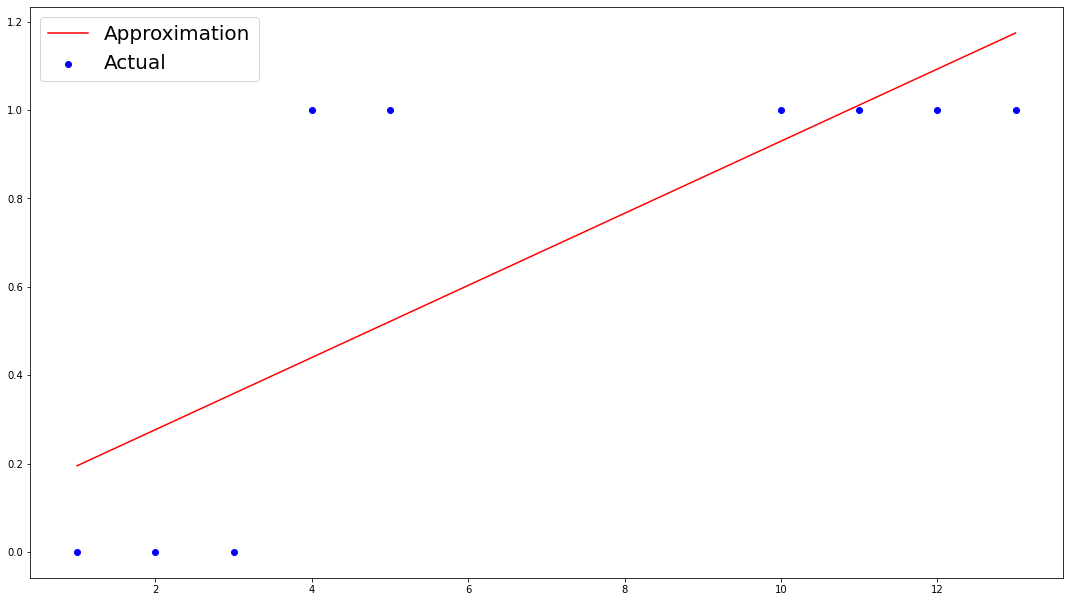

In [ ]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(X, Y, color='b', label='Actual')
plt.plot(X, Y_approximation, color='r', label='Approximation')
plt.legend(fontsize=20)

# 1.5 Testing thresholds

Because the dependent varible is binary it can be used as a classifier, but it will not be unique. To turn the regression model into a classifier we can play with the threshold.


# 1.5.1 Testing threshold of .5

In [ ]:
def my_fun(v1):
    return v1.where((m_1*X + b_1) >= .5, 0)

In [ ]:
def my_fun2(v2):
    return v2.where((m_1*X + b_1) < .5, 1)

In [ ]:
df_yhat = pd.DataFrame({
    'X': X,
    'Y': Y,
    'model': m_1*X + b_1,
    'yhat': (0,0,0,0,0,0,0,0,0) # empty values
    
})

df_yhat

,X,Y,model,yhat
0,1,0,0.194937,0
1,2,0,0.276582,0
2,3,0,0.358228,0
3,4,1,0.439873,0
4,5,1,0.521519,0
5,10,1,0.929747,0
6,11,1,1.011392,0
7,12,1,1.093038,0
8,13,1,1.174684,0


In [ ]:
df_yhat.assign(yhat=my_fun(df_yhat.model))

,X,Y,model,yhat
0,1,0,0.194937,0.000000
1,2,0,0.276582,0.000000
2,3,0,0.358228,0.000000
3,4,1,0.439873,0.000000
4,5,1,0.521519,0.521519
5,10,1,0.929747,0.929747
6,11,1,1.011392,1.011392
7,12,1,1.093038,1.093038
8,13,1,1.174684,1.174684


Looks like we found an error at x = 4

In [ ]:
df_yhat.assign(yhat=my_fun2(df_yhat.model))

,X,Y,model,yhat
0,1,0,0.194937,0.194937
1,2,0,0.276582,0.276582
2,3,0,0.358228,0.358228
3,4,1,0.439873,0.439873
4,5,1,0.521519,1.000000
5,10,1,0.929747,1.000000
6,11,1,1.011392,1.000000
7,12,1,1.093038,1.000000
8,13,1,1.174684,1.000000


In [ ]:
X_test = np.array([2.4,5.5,3.9])
Y_test = np.array([0,1,0])

In [ ]:
df_yhat2 = pd.DataFrame({
    'X': X_test,
    'Y': Y_test,
    'model_test': m_1*X_test + b_1,
    'yhat': (0,0,0)
    
})

df_yhat2

,X,Y,model_test,yhat
0,2.4,0,0.309241,0
1,5.5,1,0.562342,0
2,3.9,0,0.431709,0


In [ ]:
def my_fun_test(v1):
    return v1.where((m_1*X_test + b_1) >= .5, 0)

In [ ]:
def my_fun2_test(v2):
    return v2.where((m_1*X_test + b_1) < .5, 1)

In [ ]:
df_yhat2.assign(yhat=my_fun_test(df_yhat2.model_test))

,X,Y,model_test,yhat
0,2.4,0,0.309241,0.000000
1,5.5,1,0.562342,0.562342
2,3.9,0,0.431709,0.000000


In [ ]:
df_yhat2.assign(yhat=my_fun2_test(df_yhat2.model_test))

,X,Y,model_test,yhat
0,2.4,0,0.309241,0.309241
1,5.5,1,0.562342,1.000000
2,3.9,0,0.431709,0.431709


The error rate was 11.11% in the training dataset, where as the test dataset had no errors. 

# 1.5.2 Testing a threshold of .4

If we do the math in our heads we can see that the training set had a 0% error rate whereas the testing data had an error of 33.33% because it missed the second value. Around .43 would be an appropriate threshold. 

In [ ]:
df_yhat = pd.DataFrame({
    'X': X,
    'Y': Y,
    'model': m_1*X + b_1,
    'yhat': (0,0,0,1,1,1,1,1,1) 
    
})

df_yhat

,X,Y,model,yhat
0,1,0,0.194937,0
1,2,0,0.276582,0
2,3,0,0.358228,0
3,4,1,0.439873,1
4,5,1,0.521519,1
5,10,1,0.929747,1
6,11,1,1.011392,1
7,12,1,1.093038,1
8,13,1,1.174684,1


In [ ]:
df_yhat2 = pd.DataFrame({
    'X': X_test,
    'Y': Y_test,
    'model_test': m_1*X_test + b_1,
    'yhat': (0,1,1)
    
})

df_yhat2

,X,Y,model_test,yhat
0,2.4,0,0.309241,0
1,5.5,1,0.562342,1
2,3.9,0,0.431709,1


# 1.5.3 Testing a threshold of .435

A threshold if .435 would refine the classification to have 0% error in both the training and test sets. 

In [ ]:
df_yhat = pd.DataFrame({
    'X': X,
    'Y': Y,
    'model': m_1*X + b_1,
    'yhat': (0,0,0,1,1,1,1,1,1) 
    
})

df_yhat

,X,Y,model,yhat
0,1,0,0.194937,0
1,2,0,0.276582,0
2,3,0,0.358228,0
3,4,1,0.439873,1
4,5,1,0.521519,1
5,10,1,0.929747,1
6,11,1,1.011392,1
7,12,1,1.093038,1
8,13,1,1.174684,1


In [ ]:
df_yhat2 = pd.DataFrame({
    'X': X_test,
    'Y': Y_test,
    'model_test': m_1*X_test + b_1,
    'yhat': (0,1,0)
    
})

df_yhat2

,X,Y,model_test,yhat
0,2.4,0,0.309241,0
1,5.5,1,0.562342,1
2,3.9,0,0.431709,0


# Questions Answered:

*2. Can you use your solution to the regression problem in Q. (1) above as a classifier? Just write yes/no/maybe (if your answer is “maybe,” explain briefly)*



> Because the dependent variable is binary it can be used as a classifier. You just need to understand the threshold. 



*4. If yes, state whether the resulting classifier (that is, the one obtained from regression) is unique. Just write unique/non-unique.*



> Non-unique



*6. If your answer to Q. (4) was“non-unique,” provide threedifferent classifiers (i.e., their equations),the corresponding classificationsof the test pointsas well the corresponding error rates on training and test data.*






> You can gestimate .435 as the classifier and have 0% error, but because of the small dataset it is hard to know if this is the actual decision boundary. 



# References

> I certify that this report is 
my own, independent work and that it does not plagiarize, in part or in full, any other 
work.





*   https://stackoverflow.com/questions/43391591/if-else-function-in-pandas-dataframe
*   https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
*   https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902
*   https://www.geeksforgeeks.org/linear-regression-implementation-from-scratch-using-python/
